In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from pyBKT.models import Model


## pyBKT library

In [18]:

from pyBKT.models import Model



In [20]:
df = pd.read_csv("ct.csv", encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16857 non-null  int64  
 1   Row                          16857 non-null  int64  
 2   Anon Student Id              16857 non-null  object 
 3   Problem Hierarchy            16857 non-null  object 
 4   Problem Name                 16857 non-null  object 
 5   Problem View                 16857 non-null  int64  
 6   Step Name                    16857 non-null  object 
 7   Step Start Time              16851 non-null  object 
 8   First Transaction Time       16857 non-null  object 
 9   Correct Transaction Time     16711 non-null  object 
 10  Step End Time                16857 non-null  object 
 11  Step Duration (sec)          16851 non-null  float64
 12  Correct Step Duration (sec)  10437 non-null  float64
 13  Error Step Durat

In [21]:
df['Anon Student Id'].value_counts()

Anon Student Id
1T4w47X         84
271np4zc8vd1    68
171s0AHa        66
248iwnoa3       62
171TsMI6        62
                ..
271szevzza4w     3
171N6L94         2
225jFfJy6_a      2
BU25p0d          2
2711lacn64nc     1
Name: count, Length: 587, dtype: int64

In [22]:
df['KC(Default)'].value_counts()

KC(Default)
Calculate unit rate                             5273
Calculate part in proportion with fractions     3358
Calculate total in proportion with fractions    2968
Plot terminating proper fraction                1116
Plot imperfect radical                           923
Plot non-terminating improper fraction           726
Plot whole number                                590
Plot decimal - thousandths                       564
Plot pi                                          417
Finding the intersection, Mixed                  326
Finding the intersection, GLF                    317
Finding the intersection, SIF                    279
Name: count, dtype: int64

In [23]:
model = Model(seed = 42, num_fits = 1)

# Fetch Assistments and CognitiveTutor data (optional - if you have your own dataset, that's fine too!)
data = model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
data = model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [24]:
model.fit(data_path = 'ct.csv')
print(model.params())

                                                               value
skill                                        param   class          
Plot non-terminating improper fraction       prior   default 0.59024
                                             learns  default 0.14616
                                             guesses default 0.16883
                                             slips   default 0.24147
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.22330
                                             learns  default 0.12973
                                             guesses default 0.10112
                                             slips   default 0.22205
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.50636
                                             learns  default 0.14004
                                  

In [25]:
preds_df = model.predict(data_path = 'ct.csv')
preds_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default),correct_predictions,state_predictions
773,84051,112149,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-014,1,RationalNumberline1,2006-09-07 09:02:46.0,2006-09-07 09:03:11.0,2006-09-07 09:03:27.0,...,NaN,41.00000,0,1,0,1,Plot non-terminating improper fraction,1,0.51689,0.59024
774,84053,112151,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-041,1,RationalNumberline1,2006-09-07 09:03:59.0,2006-09-07 09:10:07.0,2006-09-07 09:13:55.0,...,NaN,596.00000,0,5,1,1,Plot imperfect radical,1,0.25226,0.22330
775,84058,112156,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-104,1,RationalNumberline1,2006-09-07 09:16:53.0,2006-09-07 09:17:33.0,2006-09-07 09:17:35.0,...,NaN,42.00000,0,1,0,1,Plot terminating proper fraction,1,0.48173,0.50636
776,84059,112157,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-122,1,RationalNumberline1,2006-09-07 09:17:41.0,2006-09-07 09:18:11.0,2006-09-07 09:18:11.0,...,30.00000,NaN,1,0,0,1,Plot pi,1,0.67695,0.26272
777,84061,112159,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-180,1,RationalNumberline1,2006-09-07 09:18:29.0,2006-09-07 09:18:44.0,2006-09-07 09:18:44.0,...,15.00000,NaN,1,0,0,1,Plot terminating proper fraction,2,0.44173,0.40755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,232433,310760,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-168,1,EquationAnswer,2006-10-20 09:05:29.0,2006-10-20 09:05:43.0,2006-10-20 09:05:43.0,...,14.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,6,0.86775,0.98830
2005,232445,310772,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-008,1,EquationAnswer,2006-10-20 09:06:41.0,2006-10-20 09:06:46.0,2006-10-20 09:06:46.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,7,0.80079,0.89249
2006,232457,310784,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-115,1,EquationAnswer,2006-10-20 09:07:34.0,2006-10-20 09:07:38.0,2006-10-20 09:07:38.0,...,4.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,7,0.87070,0.99490
2007,232469,310796,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-196,1,EquationAnswer,2006-10-20 09:08:48.0,2006-10-20 09:08:53.0,2006-10-20 09:08:53.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,8,0.85086,0.97523


In [26]:
training_rmse = model.evaluate(data_path = 'ct.csv', metric = 'rmse')
training_rmse




0.4556719885059389

In [27]:
training_auc = model.evaluate(data_path = 'ct.csv', metric = 'auc')
training_auc

0.6998815545699654

In [28]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical")
print(model.params())

                                         value
skill                  param   class          
Plot imperfect radical prior   default 0.23915
                       learns  default 0.13805
                       guesses default 0.08715
                       slips   default 0.23205
                       forgets default 0.00000


In [29]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multigs = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.37367
                       learns  default       0.02572
                       guesses RATIONAL1-032 0.20400
                               RATIONAL1-041 0.26934
                               RATIONAL1-054 0.09395
                               RATIONAL1-059 0.10471
                               RATIONAL1-085 0.07721
                               RATIONAL1-089 0.17339
                               RATIONAL1-090 0.16923
                               RATIONAL1-096 0.11179
                               RATIONAL1-137 0.05144
                               RATIONAL1-138 0.00812
                               RATIONAL1-183 0.11875
                               RATIONAL1-184 0.15124
                               RATIONAL1-193 0.10345
                               RATIONAL1-200 0.19185
                               RATIONAL1-212 0

In [30]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = True)
print(model.params())

                                               value
skill                  param   class                
Plot imperfect radical prior   default       0.27982
                       learns  RATIONAL1-032 0.15138
                               RATIONAL1-041 0.09156
                               RATIONAL1-054 0.16137
                               RATIONAL1-059 0.15261
                               RATIONAL1-085 0.09421
                               RATIONAL1-089 0.16086
                               RATIONAL1-090 0.10907
                               RATIONAL1-096 0.11347
                               RATIONAL1-137 0.15312
                               RATIONAL1-138 0.15026
                               RATIONAL1-183 0.17219
                               RATIONAL1-184 0.11267
                               RATIONAL1-193 0.13742
                               RATIONAL1-200 0.15466
                               RATIONAL1-212 0.14694
                               RATIONAL1-220 0

In [31]:
model.fit(data_path = 'ct.csv', skills = "Plot imperfect radical",multilearn = "Anon Student Id")
print(model.params())


                                          value
skill                  param   class           
Plot imperfect radical prior   default  0.35787
                       learns  0I891Gg  0.00007
                               17116XP9 0.00002
                               1712bs2B 0.00009
                               1715Zzr7 0.00067
...                                         ...
                       forgets x3A11ty  0.00000
                               xFjwn    0.00000
                               z3GhRzh  0.00000
                               z7Zg3oy  0.00000
                               zt5vuLM  0.00000

[509 rows x 1 columns]


## dummy data to experiment with pybkt


In [32]:

import random

num_students = 50
num_signs = 12
num_rows = 10000
signs = [f"SL_{i+1}" for i in range(num_signs)]
students = [f"S{str(i+1).zfill(2)}" for i in range(num_students)]
hint_types = [0, 1]

In [33]:


# Set initial mastery probabilities for each student (randomized between 0.3 and 0.5)
initial_mastery_probs = {student: random.uniform(0.3, 0.5) for student in students}

# Set the difficulty for each sign (1 to 5 scale, 5 being most difficult)
sign_difficulty = {f"SL_{i+1}": random.randint(1, 5) for i in range(num_signs)}

# Initialize the data with more realistic probabilities
realistic_data = []

for row_id in range(1, num_rows + 1):
    student_id = random.choice(students)
    sign = random.choice(signs)
    difficulty = sign_difficulty[sign]

    # Retrieve the current mastery probability for this student
    mastery_prob = initial_mastery_probs[student_id]

    # Simulate the effect of a hint: if a hint is provided, the likelihood of a correct answer increases
    hint = random.choice(hint_types)
    if hint == 1:
        mastery_prob = min(1, mastery_prob + 0.2)  # Increase mastery probability with a hint

    # Calculate the probability of a correct answer based on mastery and difficulty
    base_prob = max(0.1, mastery_prob - difficulty * 0.05)  # Harder signs reduce the probability
    correct = 1 if random.random() < base_prob else 0  # Simulate the correctness

    # Update the student's mastery probability based on whether they answered correctly
    if correct == 1:
        initial_mastery_probs[student_id] = min(1, mastery_prob + 0.05)  # Gradual increase in mastery

    # Store the row in the data
    realistic_data.append([row_id, student_id, sign, correct, hint])

# Create DataFrame
df_realistic = pd.DataFrame(realistic_data, columns=["row", "student_id", "sign", "correct", "hints"])

# Sort the data by student_id and row to maintain the temporal order
#df_realistic = df_realistic.sort_values(by=["student_id", "row"]).reset_index(drop=True)




In [34]:
df_realistic

,row,student_id,sign,correct,hints
0,1,S43,SL_1,0,1
1,2,S21,SL_7,0,1
2,3,S18,SL_11,0,1
3,4,S26,SL_3,0,1
4,5,S48,SL_7,1,1
...,...,...,...,...,...
9995,9996,S10,SL_8,1,0
9996,9997,S31,SL_2,1,1
9997,9998,S03,SL_12,1,0
9998,9999,S10,SL_2,1,0


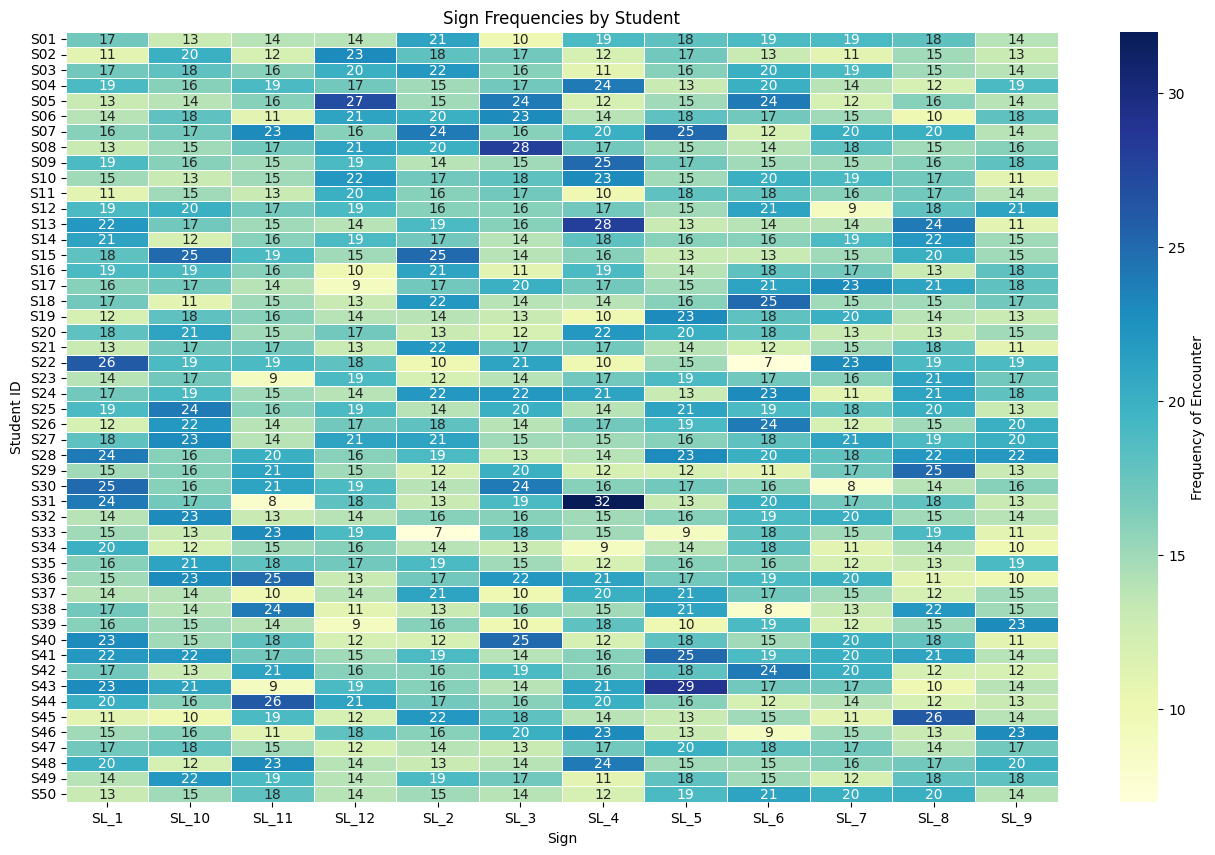

In [35]:

pivot_frequency = df_realistic.pivot_table(index="student_id", columns="sign", values="row", aggfunc="count", fill_value=0)


plt.figure(figsize=(16, 10))
sns.heatmap(pivot_frequency, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Frequency of Encounter'}, linewidths=0.5)
plt.title("Sign Frequencies by Student")
plt.xlabel("Sign")
plt.ylabel("Student ID")
plt.show()


In [36]:
df_realistic.columns

Index(['row', 'student_id', 'sign', 'correct', 'hints'], dtype='object')

In [4]:

defaults = {
    'user_id': 'student_id',
    'order_id': 'row',
    'skill_name': 'sign',
    'correct': 'correct',
}



predicted = model.fit(data=df_realistic, defaults=defaults)


model.params()

NameError: name 'model' is not defined

In [ ]:
!pip list


Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd             

# 

# real data

In [5]:
from pyBKT.models import Model
from pprint import pprint
df = pd.read_csv('data.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness'
}

model = Model(seed=42, num_fits=1)
model.fit(data=df, defaults=defaults)
params = model.params()
params
pprint(params)


                        value
skill param   class          
1     prior   default 0.00000
      learns  default 0.17884
      guesses default 0.09553
      slips   default 0.15121
      forgets default 0.00000
10    prior   default 0.00000
      learns  default 0.17468
      guesses default 0.05758
      slips   default 0.13421
      forgets default 0.00000
18    prior   default 0.00000
      learns  default 0.16132
      guesses default 0.06947
      slips   default 0.13995
      forgets default 0.00000
23    prior   default 0.00000
      learns  default 0.15979
      guesses default 0.07962
      slips   default 0.12354
      forgets default 0.00000
12    prior   default 0.00002
      learns  default 0.15874
      guesses default 0.08985
      slips   default 0.13638
      forgets default 0.00000
8     prior   default 0.00000
      learns  default 0.13732
      guesses default 0.17147
      slips   default 0.07694
      forgets default 0.00000
15    prior   default 0.00000
      lear

In [6]:
accuracy = model.evaluate(data=df, metric='accuracy')
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7857777777777778


In [7]:
rmse = model.evaluate(data=df)
print("Model RMSE:", rmse)

Model RMSE: 0.38885593706293714


In [8]:
auc = model.evaluate(data=df, metric='auc')
print("Model AUC:", auc)


Model AUC: 0.8617375094521034


evaluatingt the models with tet and train

In [13]:
from sklearn.model_selection import train_test_split

# Get unique student IDs
unique_students = df['Student ID'].unique()

# Split students into train (80%) and test (20%)
train_students, test_students = train_test_split(unique_students, test_size=0.2, random_state=42)

# Create train and test sets based on student IDs
train_df = df[df['Student ID'].isin(train_students)]
test_df = df[df['Student ID'].isin(test_students)]

# Train the model
model.fit(data=train_df, defaults=defaults)

# Evaluate on test set
accuracy = model.evaluate(data=test_df, metric='accuracy')
print("Test Accuracy:", accuracy)


accuracy = model.evaluate(data=train_df, metric='accuracy')
print("trian Accuracy:", accuracy)


Test Accuracy: 0.7827777777777778
trian Accuracy: 0.7870833333333334


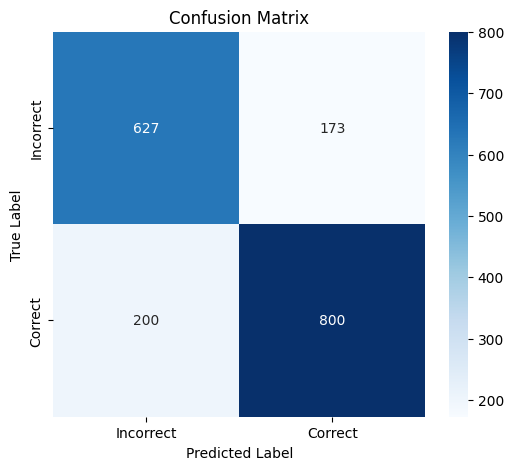

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from pyBKT.models import Model

# Load the dataset
df = pd.read_csv('data.csv')

# Ensure data is sorted by student attempts
df = df.sort_values(by='Opportunity Count')

# Split dataset by Student ID (Recommended)
unique_students = df['Student ID'].unique()
train_students, test_students = train_test_split(unique_students, test_size=0.2, random_state=42)

train_df = df[df['Student ID'].isin(train_students)]
test_df = df[df['Student ID'].isin(test_students)]

# Define column mappings for PyBKT
defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness'
}

# Train the model
model = Model(seed=42, num_fits=1)
model.fit(data=train_df, defaults=defaults)

# Get model predictions
preds_df = model.predict(data=test_df)

# Extract actual correctness values (true labels)
y_true = test_df['Correctness'].values  # 1 = Correct, 0 = Incorrect

# Extract predicted probabilities and convert to binary labels
y_pred_prob = preds_df['correct_predictions'].values  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to 0 or 1

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [17]:
preds_df.head(10)

,Student ID,Skill ID,Opportunity Count,Correctness,TimesTaken,correct_predictions,state_predictions
0,1,1,1,0,5000,0.06827,0.00000
270,1,19,1,0,5000,0.13497,0.00000
315,1,22,1,0,5000,0.13115,0.00002
90,1,7,1,0,5000,0.10244,0.00053
285,1,20,1,0,5000,0.06399,0.00003
210,1,15,1,0,5000,0.10806,0.00000
105,1,8,1,0,5000,0.18731,0.00000
165,1,12,1,0,5000,0.12447,0.00000
330,1,23,1,0,5000,0.07564,0.00000
255,1,18,1,0,5000,0.07322,0.00001


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from pyBKT.models import Model

# Load the dataset
df = pd.read_csv('data.csv')

# Ensure data is sorted by student attempts (Opportunity Count)
df = df.sort_values(by='Opportunity Count')

# Split dataset by Student ID to maintain sequential data structure
unique_students = df['Student ID'].unique()
train_students, test_students = train_test_split(unique_students, test_size=0.2, random_state=50)

train_df = df[df['Student ID'].isin(train_students)]
test_df = df[df['Student ID'].isin(test_students)]

# Define column mappings for PyBKT
defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness'
}

# Train the model on training data
model = Model(seed=42, num_fits=1)
model.fit(data=train_df, defaults=defaults,forgets=True)

# Get model predictions for both train and test sets
train_preds = model.predict(data=train_df)
test_preds = model.predict(data=test_df)

# Extract actual correctness values (true labels)
y_train_true = train_df['Correctness'].values  # 1 = Correct, 0 = Incorrect
y_test_true = test_df['Correctness'].values  # 1 = Correct, 0 = Incorrect

# Extract predicted probabilities
y_train_pred_prob = train_preds['correct_predictions'].values  # Probabilities
y_test_pred_prob = test_preds['correct_predictions'].values  # Probabilities

# Compute Log Loss for Training and Testing
train_logloss = log_loss(y_train_true, y_train_pred_prob)
test_logloss = log_loss(y_test_true, y_test_pred_prob)

# Print results
print(f"Training Log Loss: {train_logloss:.4f}")
print(f"Testing Log Loss: {test_logloss:.4f}")


Training Log Loss: 0.4744
Testing Log Loss: 0.4544


In [22]:
test_students

array([14,  8,  1, 22, 20])

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss, fbeta_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
from pyBKT.models import Model

# Load the dataset
df = pd.read_csv('data.csv')

# Ensure data is sorted by student attempts (Opportunity Count)
df = df.sort_values(by='Opportunity Count')

# Split dataset by Student ID to maintain sequential data structure
unique_students = df['Student ID'].unique()
train_students, test_students = train_test_split(unique_students, test_size=0.2, random_state=50)

train_df = df[df['Student ID'].isin(train_students)]
test_df = df[df['Student ID'].isin(test_students)]

# Define column mappings for PyBKT
defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness'
}

# Different model variations
model_variations = [
    {"name": "Base Model", "params": {}},
    {"name": "Forgets", "params": {"forgets": True}},
    {"name": "Multigs", "params": {"multigs": True}},
    {"name": "Forgets + Multigs", "params": {"forgets": True, "multigs": True}},
    {"name": "Forgets + Multigs + Multilearn", "params": {"forgets": True, "multigs": True, "multilearn": True}}
]

# Define metrics functions
def f2_score_metric(y_true, y_pred_prob):
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    return fbeta_score(y_true, y_pred, beta=2)

metrics = {
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "AUC": roc_auc_score,
    "Log Loss": log_loss,
    "F2 Score": f2_score_metric
}

# Store results
results = []

for variation in model_variations:
    print(f"Training {variation['name']} model...")
    
    # Initialize and train the model
    model = Model(seed=42, num_fits=1)
    model.fit(data=train_df, defaults=defaults, **variation["params"])
    
    # Get predictions for train and test sets
    train_preds = model.predict(data=train_df)
    test_preds = model.predict(data=test_df)
    
    # Extract actual correctness values (true labels)
    y_train_true = train_df['Correctness'].values
    y_test_true = test_df['Correctness'].values
    
    # Extract predicted probabilities
    y_train_pred_prob = train_preds['correct_predictions'].values
    y_test_pred_prob = test_preds['correct_predictions'].values
    
    # Evaluate each metric
    scores = {"Model": variation["name"]}
    for metric_name, metric_func in metrics.items():
        train_metric = metric_func(y_train_true, y_train_pred_prob)
        test_metric = metric_func(y_test_true, y_test_pred_prob)
        scores[f"Train {metric_name}"] = train_metric
        scores[f"Test {metric_name}"] = test_metric
    
    results.append(scores)

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


Training Base Model model...
Training Forgets model...
Training Multigs model...


KeyError: 'multigs default column not specified'